In [2]:
import numpy as np
import matplotlib.pyplot as plt

Randomly sample initial data.

In [3]:
A = np.random.randn(50,100)
x = np.zeros((100,1))
x[np.random.randint(0,100,5)] = np.random.randn(5,1)
e = np.sqrt(0.1)*np.random.randn(50,1)
b = np.dot(A,x)+e

D = 2*np.dot(A.T,A)
P = 2*np.dot(A.T,b)

# 1. Proximal Gradient Method

Implement the soft-thresholding operator.

In [4]:
def soft_threshold1(x_in,lambda_,alpha):
    x_out = np.zeros_like(x_in)
    index = np.where(x_in > lambda_*alpha)[0]
    x_out[index] = x_in[index]-lambda_*alpha
    index = np.where(x_in < -lambda_*alpha)[0]
    x_out[index] = x_in[index]+lambda_*alpha
    return x_out

Set parameters and initialize variable.   
Start iteration and record the intermediate results.

Find best p/2.

In [5]:
alpha1 = 0.0025 
#smaller numbers are also avaliable
lambda1 = [0.1,1,2.5,5,7.5,8.75,10,15,20]
#p/2, most of time between 5 and 10
max_steps1 = 1000
result_list1 = []

for lambda_ in lambda1:
    x_k_1 = np.zeros((100,1))
    result_list = []
    for k in range(max_steps1):
        x_k_1 = x_k_1-alpha1*(np.dot(D,x_k_1)-P)    
        x_k_1 = soft_threshold1(x_k_1,lambda_,alpha1)
        result_list.append(x_k_1)
    result_list1.append(result_list)

Draw the required plots.

The final L1 error is 2.7282397725645215 with p/2 of 0.1.
The final L1 error is 1.2210646915446899 with p/2 of 1.
The final L1 error is 0.7996196917489683 with p/2 of 2.5.
The final L1 error is 0.4864243460278071 with p/2 of 5.
The final L1 error is 0.4441674476214128 with p/2 of 7.5.
The final L1 error is 0.46857466609112286 with p/2 of 8.75.
The final L1 error is 0.5100176849284429 with p/2 of 10.
The final L1 error is 0.654974141243431 with p/2 of 15.
The final L1 error is 0.8100615827898343 with p/2 of 20.


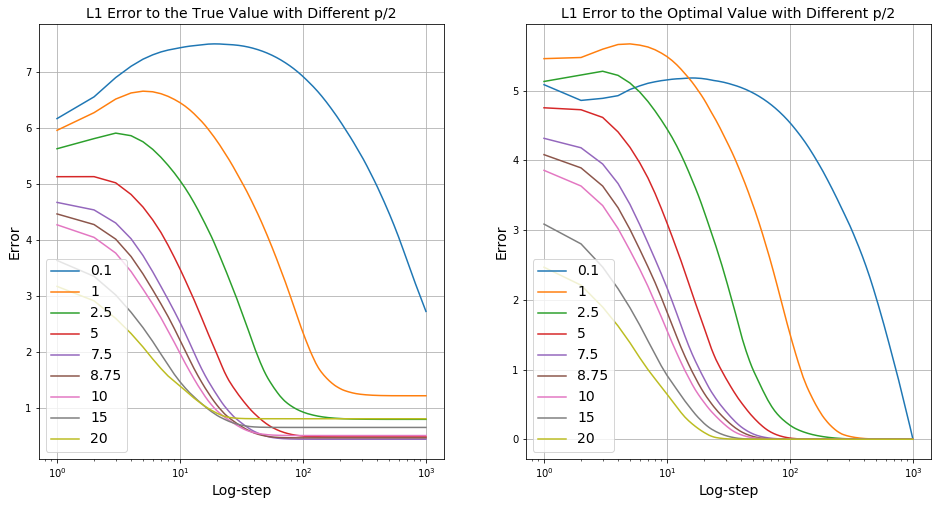

In [6]:
step_index1 = np.linspace(1,max_steps1,max_steps1)
plt.figure(figsize = (16,8))

plt.subplot(121)
for i in range(len(lambda1)):
    error_list = [np.abs(x_i-x).sum() for x_i in result_list1[i]]
    plt.plot(step_index1,error_list,label = str(lambda1[i]))
    print('The final L1 error is {} with p/2 of {}.'.format(error_list[-1],lambda1[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the True Value with Different p/2',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14)
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
for i in range(len(lambda1)):
    error_list = [np.abs(x_i-result_list1[i][-1]).sum() for x_i in result_list1[i]]
    plt.plot(step_index1,error_list,label = str(lambda1[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the Optimal Value with Different p/2',fontsize = 14)
plt.xscale('log')
plt.legend(loc = 'best',fontsize = 14)
plt.grid(True)

plt.show()    

Find best alpha.

In [7]:
alpha1 = [0.003,0.0025,0.001,0.0005,0.0001] 
#smaller numbers are also avaliable
lambda1 = 10
#p/2, most of time between 5 and 10
max_steps1 = 1000
result_list1 = []

for alpha in alpha1:
    x_k_1 = np.zeros((100,1))
    result_list = []
    for k in range(max_steps1):
        x_k_1 = x_k_1-alpha*(np.dot(D,x_k_1)-P)    
        x_k_1 = soft_threshold1(x_k_1,lambda1,alpha)
        result_list.append(x_k_1)
    result_list1.append(result_list)

The final L1 error is 0.5100176849284423 with alpha of 0.003.
The final L1 error is 0.5100176849284429 with alpha of 0.0025.
The final L1 error is 0.5100176849284443 with alpha of 0.001.
The final L1 error is 0.5100176877282758 with alpha of 0.0005.
The final L1 error is 0.5704898037247722 with alpha of 0.0001.


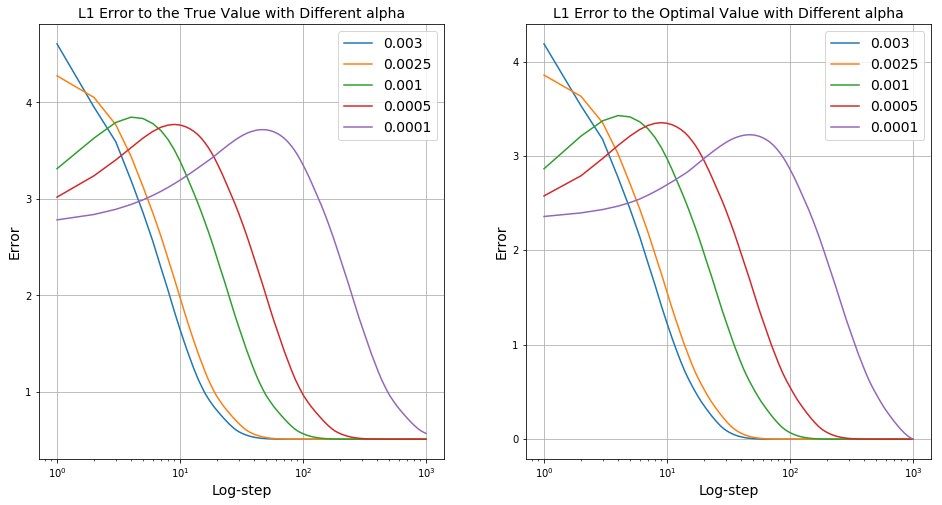

In [8]:
step_index1 = np.linspace(1,max_steps1,max_steps1)
plt.figure(figsize = (16,8))

plt.subplot(121)
for i in range(len(alpha1)):
    error_list = [np.abs(x_i-x).sum() for x_i in result_list1[i]]
    plt.plot(step_index1,error_list,label = str(alpha1[i]))
    print('The final L1 error is {} with alpha of {}.'.format(error_list[-1],alpha1[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the True Value with Different alpha',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14)
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
for i in range(len(alpha1)):
    error_list = [np.abs(x_i-result_list1[i][-1]).sum() for x_i in result_list1[i]]
    plt.plot(step_index1,error_list,label = str(alpha1[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the Optimal Value with Different alpha',fontsize = 14)
plt.xscale('log')
plt.legend(loc = 'best',fontsize = 14)
plt.grid(True)

plt.show()    

# 2. ADMM

Implement the soft-thresholding operator.

In [9]:
def soft_threshold2(x_in,v,lambda_,lagrange_c):
    x_out = np.zeros_like(x_in)
    index = np.where(x_in > (v+lambda_)/lagrange_c)[0] 
    x_out[index] = x_in[index]-(v[index]+lambda_)/lagrange_c
    index = np.where(x_in < (v-lambda_)/lagrange_c)[0] 
    x_out[index] = x_in[index]+(lambda_-v[index])/lagrange_c
    return x_out

Set parameters and initialize variable.   
Start iteration and record the intermediate results.

Find best p/2.

In [10]:
lambda2 = [0.1,1,2.5,5,7.5,8.75,10,15,20]
#p/2, most of time between 5 and 10
lagrange_c = 100
#10~1000 is preferred
max_steps2 = 1000
result_list2 = []
inverse = np.matrix(D+lagrange_c*np.eye(100)).I

for lambda_ in lambda2:
    x_k_2 = np.zeros((100,1))
    z_k_2 = np.zeros((100,1))
    v_k_2 = np.zeros((100,1))
    result_list = []
    for k in range(max_steps2):
        x_k_2 = P+lagrange_c*z_k_2+v_k_2
        x_k_2 = np.dot(inverse,x_k_2)
        z_k_2 = soft_threshold2(x_k_2,v_k_2,lambda_,lagrange_c)
        v_k_2 = v_k_2+lagrange_c*(z_k_2-x_k_2)
        result_list.append(x_k_2)
    result_list2.append(result_list)

The final L1 error is 1.7799413515200921 with p/2 of 0.1.
The final L1 error is 1.2210642530527525 with p/2 of 1.
The final L1 error is 0.7996196677541633 with p/2 of 2.5.
The final L1 error is 0.48642434602780665 with p/2 of 5.
The final L1 error is 0.44416744762141114 with p/2 of 7.5.
The final L1 error is 0.46857466609112053 with p/2 of 8.75.
The final L1 error is 0.5100176849284418 with p/2 of 10.
The final L1 error is 0.6549741412434318 with p/2 of 15.
The final L1 error is 0.8100615827898353 with p/2 of 20.


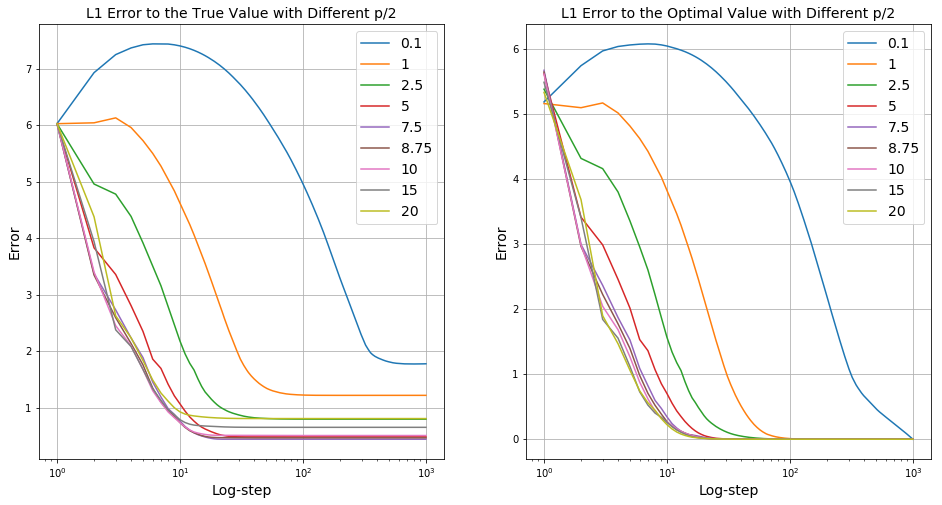

In [11]:
step_index2 = np.linspace(1,max_steps2,max_steps2)
plt.figure(figsize = (16,8))

plt.subplot(121)
for i in range(len(lambda2)):
    error_list = [np.abs(x_i-x).sum() for x_i in result_list2[i]]
    plt.plot(step_index2,error_list,label = str(lambda2[i]))
    print('The final L1 error is {} with p/2 of {}.'.format(error_list[-1],lambda2[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the True Value with Different p/2',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14)
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
for i in range(len(lambda2)):
    error_list = [np.abs(x_i-result_list2[i][-1]).sum() for x_i in result_list2[i]]
    plt.plot(step_index2,error_list,label = str(lambda2[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the Optimal Value with Different p/2',fontsize = 14)
plt.xscale('log')
plt.legend(loc = 'best',fontsize = 14)
plt.grid(True)

plt.show()    

Find best c.

In [14]:
lambda2 = 7.5
#p/2, most of time between 5 and 10
lagrange_c = [1,10,50,100,500,1000,5000]
#10~1000 is preferred
max_steps2 = 1000
result_list2 = []

for c in lagrange_c:
    inverse = np.matrix(D+c*np.eye(100)).I
    x_k_2 = np.zeros((100,1))
    z_k_2 = np.zeros((100,1))
    v_k_2 = np.zeros((100,1))
    result_list = []
    for k in range(max_steps2):
        x_k_2 = P+c*z_k_2+v_k_2
        x_k_2 = np.dot(inverse,x_k_2)
        z_k_2 = soft_threshold2(x_k_2,v_k_2,lambda2,c)
        v_k_2 = v_k_2+c*(z_k_2-x_k_2)
        result_list.append(x_k_2)
    result_list2.append(result_list)

The final L1 error is 0.47268866645300966 with c of 1.
The final L1 error is 0.4441674476567795 with c of 10.
The final L1 error is 0.44416744762141436 with c of 50.
The final L1 error is 0.44416744762141114 with c of 100.
The final L1 error is 0.44416744762140875 with c of 500.
The final L1 error is 0.44416744762145677 with c of 1000.
The final L1 error is 0.4491420014473286 with c of 5000.


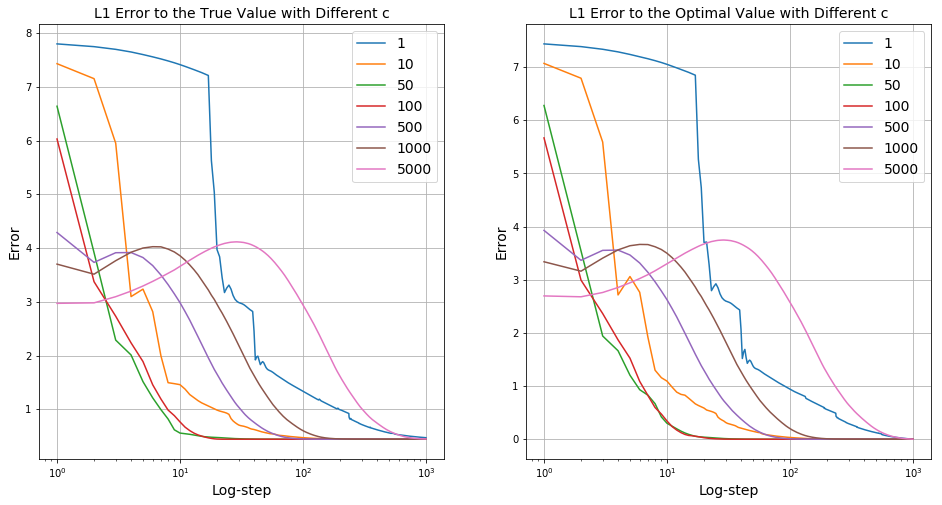

In [15]:
step_index2 = np.linspace(1,max_steps2,max_steps2)
plt.figure(figsize = (16,8))

plt.subplot(121)
for i in range(len(lagrange_c)):
    error_list = [np.abs(x_i-x).sum() for x_i in result_list2[i]]
    plt.plot(step_index2,error_list,label = str(lagrange_c[i]))
    print('The final L1 error is {} with c of {}.'.format(error_list[-1],lagrange_c[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the True Value with Different c',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14)
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
for i in range(len(lagrange_c)):
    error_list = [np.abs(x_i-result_list2[i][-1]).sum() for x_i in result_list2[i]]
    plt.plot(step_index2,error_list,label = str(lagrange_c[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the Optimal Value with Different c',fontsize = 14)
plt.xscale('log')
plt.legend(loc = 'best',fontsize = 14)
plt.grid(True)

plt.show()    

# 3. Subgradient Methods

Implement the subgradient operator.

In [16]:
def subgradient(x_in,lambda_):
    x_out = np.zeros_like(x_in)
    index = np.where(x_in > 0)[0]
    x_out[index] = lambda_
    index = np.where(x_in < 0)[0]
    x_out[index] = -lambda_
    index = np.where(x_in == 0)[0]
    x_out[index] = 2*lambda_*(np.random.rand(len(index),1)-0.5)
    return x_out

Find best p/2.

In [35]:
alpha3 = 0.0025
#0.0025 is usually the optimal
lambda3 = [0.1,1,2.5,5,7.5,8.75,10,15,20]
#p/2, most of time between 5 and 10
max_steps3 = 2000
result_list3 = []

for lambda_ in lambda3:
    x_k_3 = np.zeros((100,1))
    result_list = []
    for k in range(max_steps3):
        sub_grad = subgradient(x_k_3,lambda_)
        x_k_3 = x_k_3 - (np.dot(D,x_k_3)-P+sub_grad)*alpha3/(np.sqrt(k+1))
        result_list.append(x_k_3)
    result_list3.append(result_list)

The final L1 error is 7.038981459477391 with p/2 of 0.1.
The final L1 error is 2.735853831204386 with p/2 of 1.
The final L1 error is 0.9989937281332122 with p/2 of 2.5.
The final L1 error is 0.5319112656688867 with p/2 of 5.
The final L1 error is 0.4721066309537996 with p/2 of 7.5.
The final L1 error is 0.4997083616482709 with p/2 of 8.75.
The final L1 error is 0.5472728733534048 with p/2 of 10.
The final L1 error is 0.7003267689637581 with p/2 of 15.
The final L1 error is 0.8835495793288892 with p/2 of 20.


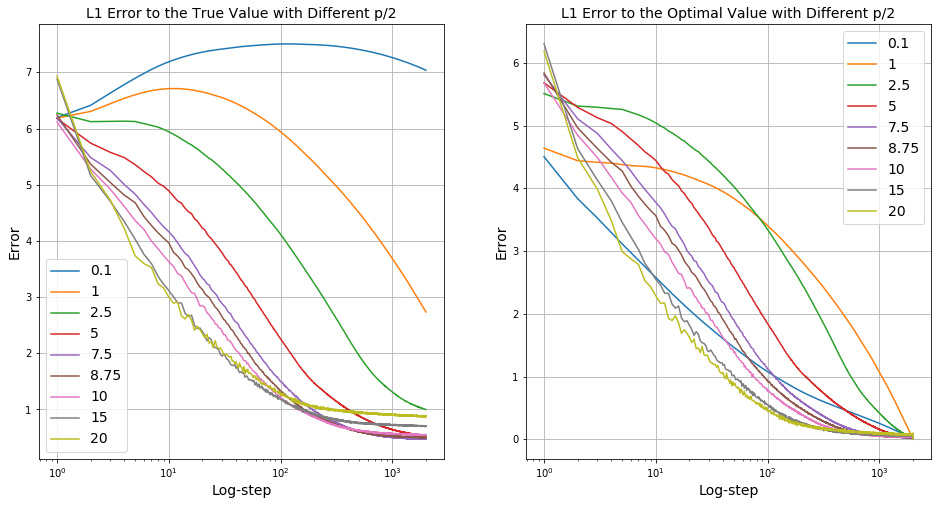

In [36]:
step_index3 = np.linspace(1,max_steps3,max_steps3)
plt.figure(figsize = (16,8))

plt.subplot(121)
for i in range(len(lambda3)):
    error_list = [np.abs(x_i-x).sum() for x_i in result_list3[i]]
    plt.plot(step_index3,error_list,label = str(lambda3[i]))
    print('The final L1 error is {} with p/2 of {}.'.format(error_list[-1],lambda3[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the True Value with Different p/2',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14)
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
for i in range(len(lambda3)):
    error_list = [np.abs(x_i-result_list3[i][-1]).sum() for x_i in result_list3[i]]
    plt.plot(step_index3,error_list,label = str(lambda3[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the Optimal Value with Different p/2',fontsize = 14)
plt.xscale('log')
plt.legend(loc = 'best',fontsize = 14)
plt.grid(True)

plt.show()    

Find best alpha.

In [31]:
alpha3 = [0.003,0.0025,0.001,0.0005,0.0001]
#0.0025 is usually the optimal
lambda3 = 7.5
#p/2, most of time between 5 and 10
max_steps3 = 2000
result_list3 = []

for alpha in alpha3:
    x_k_3 = np.zeros((100,1))
    result_list = []
    for k in range(max_steps3):
        sub_grad = subgradient(x_k_3,lambda3)
        x_k_3 = x_k_3 - (np.dot(D,x_k_3)-P+sub_grad)*alpha/(np.sqrt(k+1))
        result_list.append(x_k_3)
    result_list3.append(result_list)

The final L1 error is 0.4803018525276962 with alpha of 0.003.
The final L1 error is 0.4752900081582084 with alpha of 0.0025.
The final L1 error is 0.6915815950444604 with alpha of 0.001.
The final L1 error is 1.4712650198977422 with alpha of 0.0005.
The final L1 error is 4.017675524365025 with alpha of 0.0001.


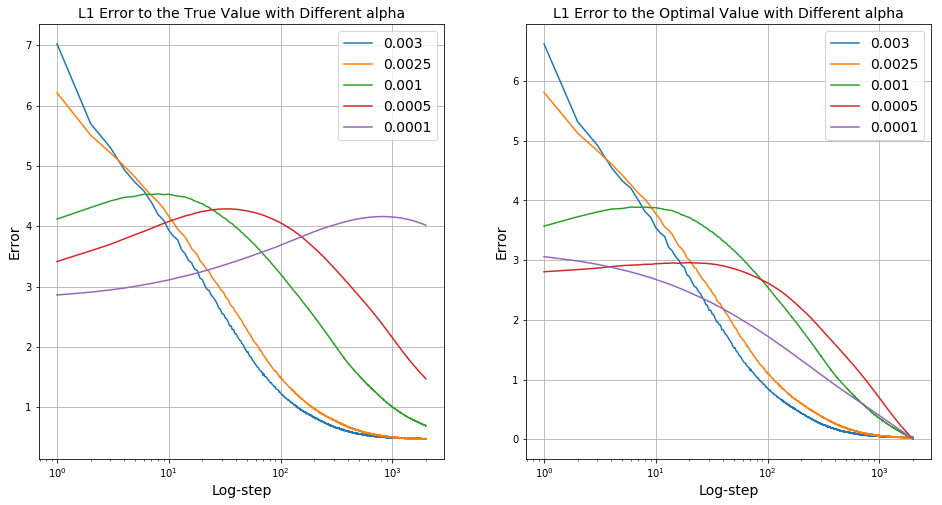

In [32]:
step_index3 = np.linspace(1,max_steps3,max_steps3)
plt.figure(figsize = (16,8))

plt.subplot(121)
for i in range(len(alpha3)):
    error_list = [np.abs(x_i-x).sum() for x_i in result_list3[i]]
    plt.plot(step_index3,error_list,label = str(alpha3[i]))
    print('The final L1 error is {} with alpha of {}.'.format(error_list[-1],alpha3[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the True Value with Different alpha',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14)
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
for i in range(len(alpha3)):
    error_list = [np.abs(x_i-result_list3[i][-1]).sum() for x_i in result_list3[i]]
    plt.plot(step_index3,error_list,label = str(alpha3[i]))
plt.xlabel('Log-step',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('L1 Error to the Optimal Value with Different alpha',fontsize = 14)
plt.xscale('log')
plt.legend(loc = 'best',fontsize = 14)
plt.grid(True)

plt.show()    